In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

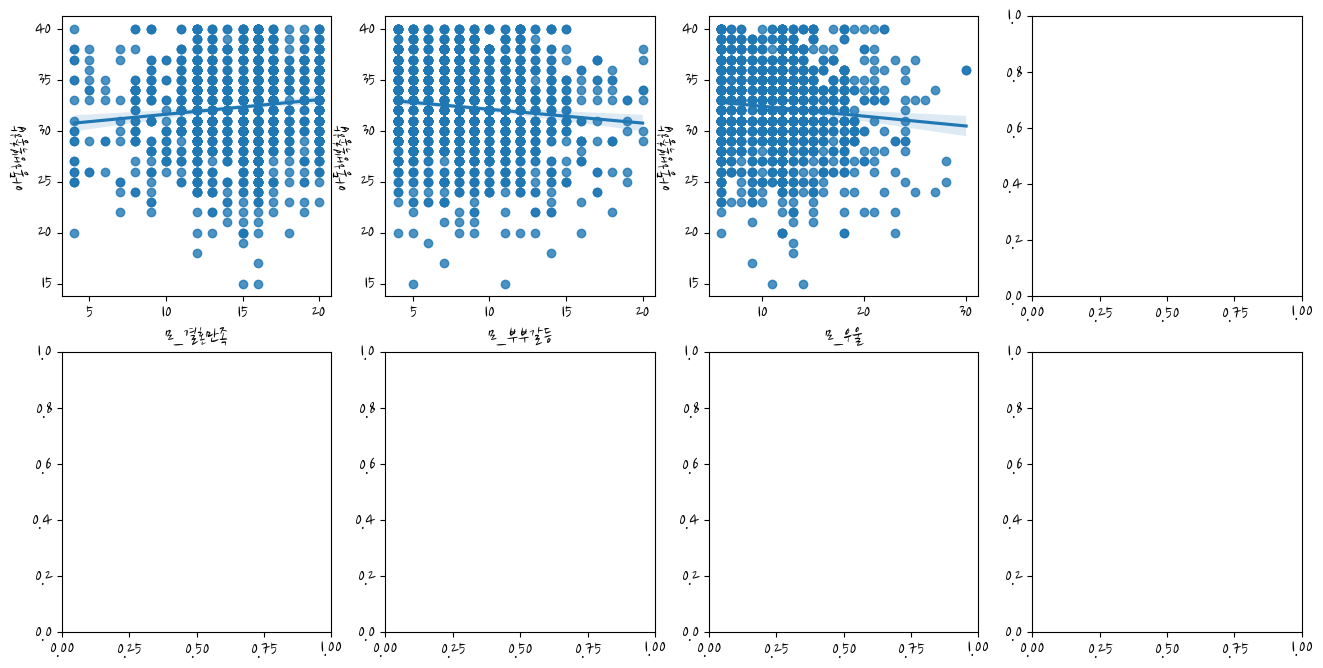

In [215]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4, nrows=2)
lm_features = ['모_결혼만족', '모_부부갈등', '모_우울']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='아동행복총합', data = X, ax=axs[row][col])

Text(0, 0.5, '아동행복')

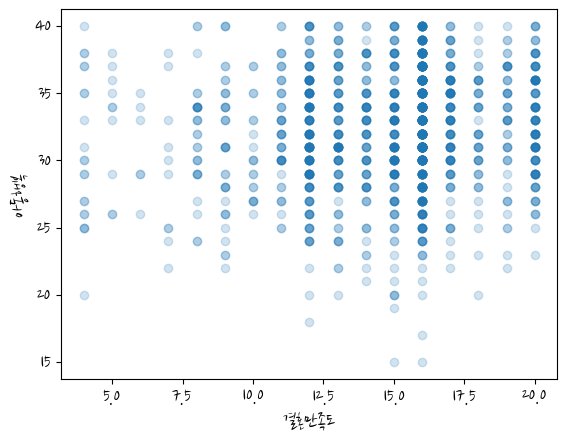

In [225]:
plt.scatter(X['모_결혼만족'], X['아동행복총합'], alpha= 0.2)
plt.xlabel('결혼만족도')
plt.ylabel('아동행복')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='행복감', ylabel='아동행복총합'>

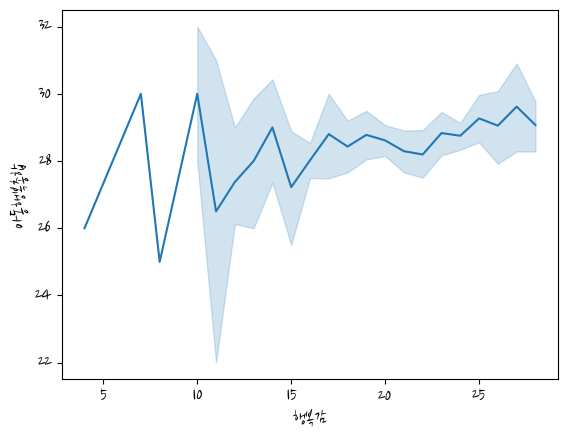

In [301]:
sns.lineplot(X['행복감'], X['아동행복총합'], data = X)

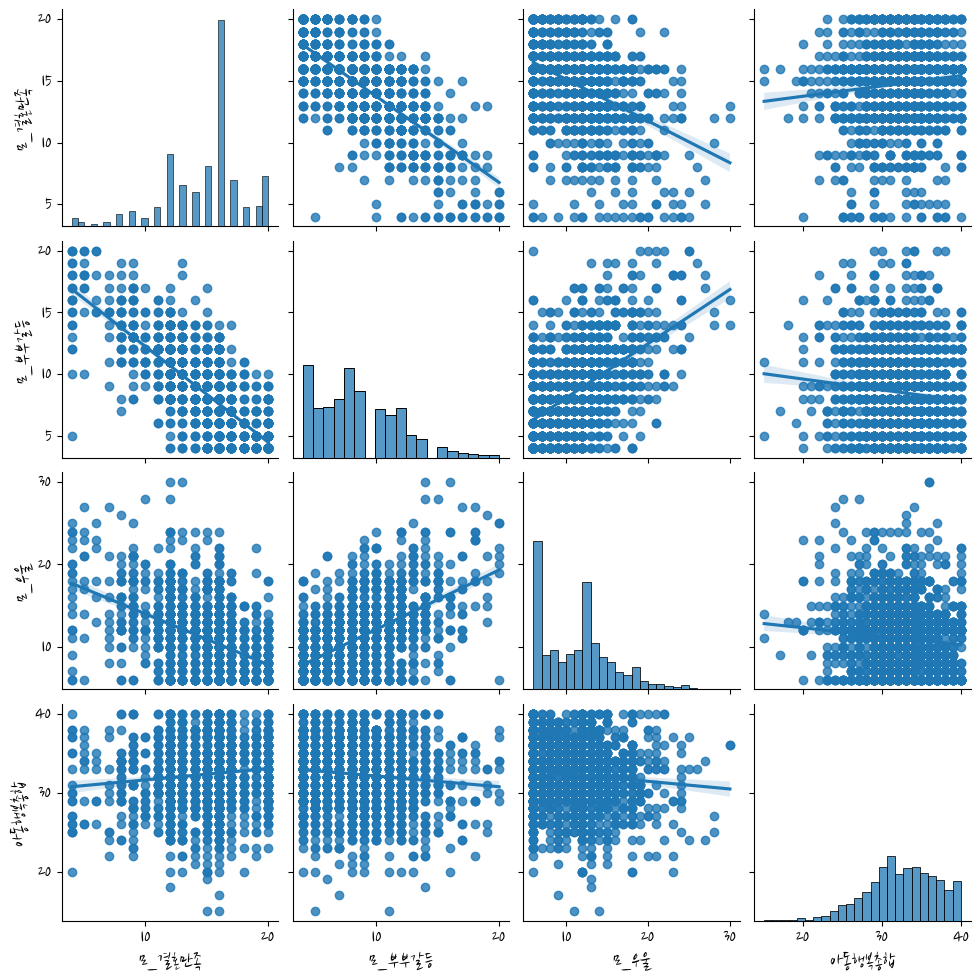

In [236]:
sns.pairplot(X, kind='reg')

<AxesSubplot:>

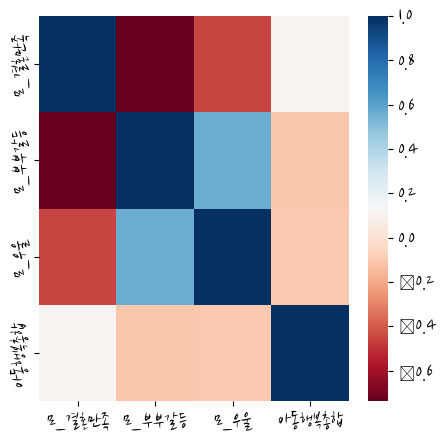

In [251]:
plt.figure(figsize=(5, 5))
corr = X.corr()
sns.heatmap(corr, cmap='RdBu')

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


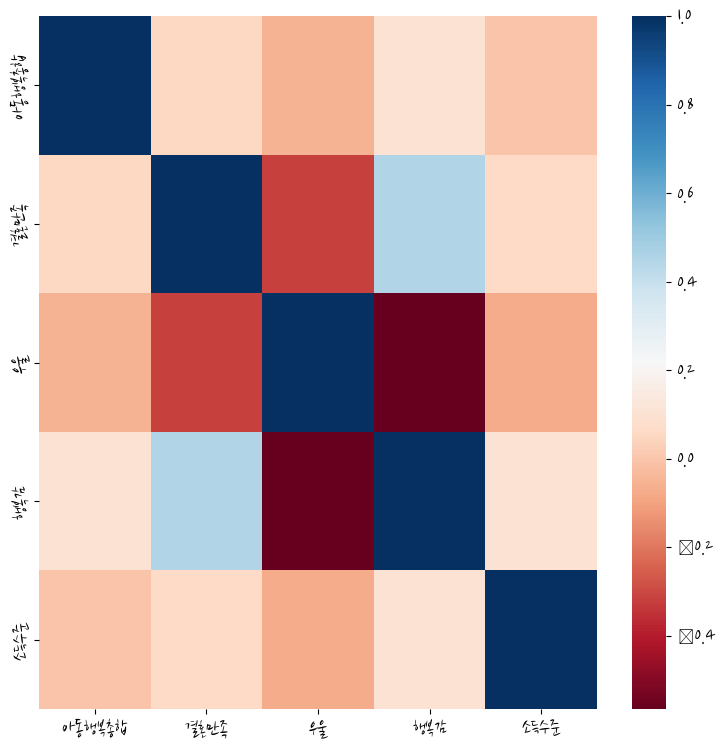

In [302]:
plt.figure(figsize=(9, 9))
corr = X.corr()
sns.heatmap(corr, cmap='RdBu')

In [272]:
from scipy.stats import pearsonr

In [406]:
X2.columns = ['아동행복총합', '학교적응', '결혼만족', '우울', '행복감']
X2

,아동행복총합,학교적응,결혼만족,우울,행복감
0,0.565217,0.616667,0.8750,0.291667,0.750000
1,0.565217,0.716667,0.8125,0.208333,0.791667
2,0.521739,0.550000,0.7500,0.458333,0.666667
3,0.608696,0.650000,0.8750,0.250000,0.666667
4,0.826087,0.816667,0.7500,0.291667,0.666667
...,...,...,...,...,...
1226,0.434783,0.633333,0.5000,0.541667,0.500000
1227,0.521739,0.733333,1.0000,0.000000,0.916667
1228,0.652174,0.633333,0.5000,0.250000,0.500000
1229,0.652174,0.666667,0.2500,0.250000,0.666667


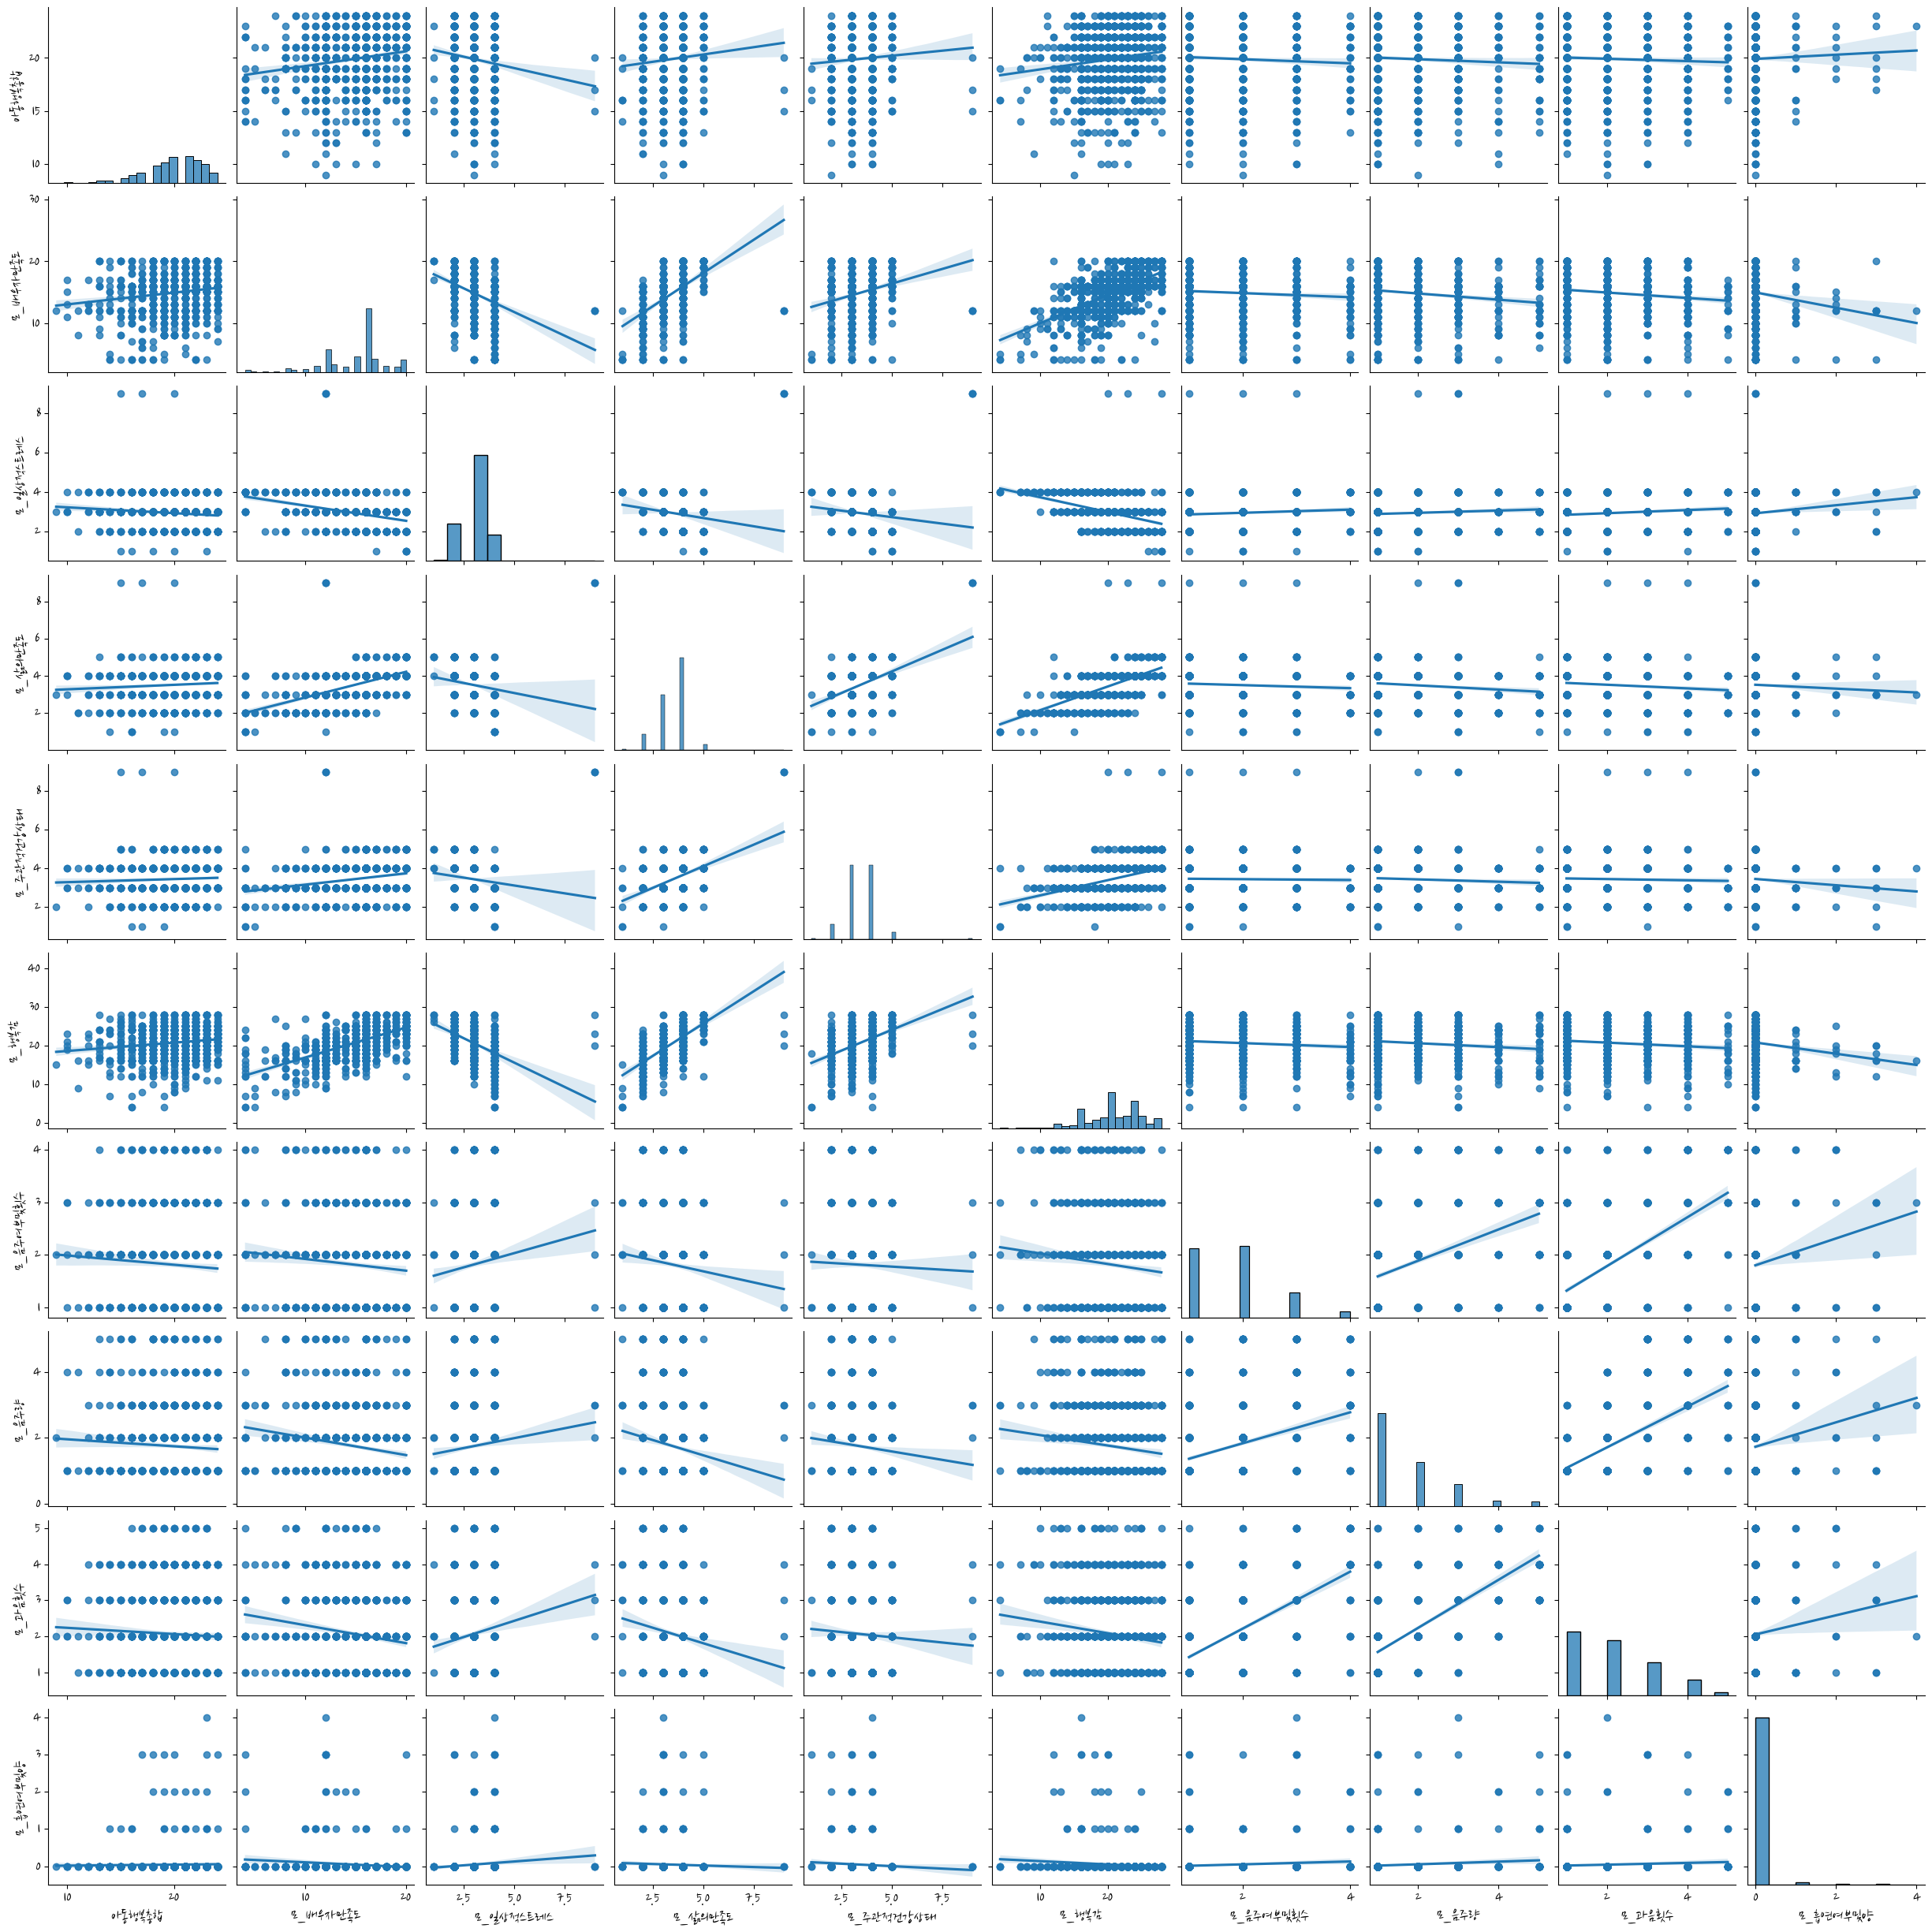

In [304]:
w17=pd.read_csv('data/w10_2017_data_221013.csv', encoding='cp949')
w=w17[['N_ID','JCh17shs006','JCh17shs007','JCh17shs008','JCh17shs009','JCh17shs010','JCh17shs011'
,'EMt17mrs001'   # '모' 배우자 만족도
,'EMt17mrs002'
,'EMt17mrs003'
,'EMt17mrs004'
,'EMt17prs012'   # '모' 일상적 스트레스
,'EMt17shs012'   # '모' 삶의 만족도
,'EMt17hlt049'   # '모' 주관적 건강상태
,'EMt17shs001'   # '모' 행복감
,'EMt17shs002' 
,'EMt17shs003'
,'EMt17shs004'
,'EMt17drn002'   # '모' 음주여부 및 횟수
,'EMt17drn003'   # '모' 음주량
,'EMt17drn004'   # '모' 과음 횟수
,'EMt17smk005'   # '모' 흡연 여부 및 양
]]

w=w.replace(' ',None)
w=w.dropna()
w=w.astype('int')
# w.describe()
for i in w.columns:
        w[i]= w[i].replace(88888888,3)
        w[i]= w[i].replace(99999999,3)
w['아동행복총합']= w[['JCh17shs006','JCh17shs007','JCh17shs008','JCh17shs009','JCh17shs010','JCh17shs011']].sum(axis=1)
w['모_배우자만족도']=w[['EMt17mrs001'   # '모' 배우자 만족도
,'EMt17mrs002'
,'EMt17mrs003'
,'EMt17mrs004']].sum(axis=1)
w['모_일상적스트레스']=w[['EMt17prs012']].sum(axis=1)
w['모_삶의만족도']=w[['EMt17shs012']].sum(axis=1)
w['모_주관적건강상태']=w[['EMt17hlt049']].sum(axis=1)
w['모_행복감']=w[['EMt17shs001'   # '모' 행복감
,'EMt17shs002' 
,'EMt17shs003'
,'EMt17shs004']].sum(axis=1)
w['모_음주여부및횟수']=w[['EMt17drn002']].sum(axis=1)
w['모_음주량']=w[['EMt17drn003']].sum(axis=1)
w['모_과음횟수']=w[['EMt17drn004']].sum(axis=1)
w['모_흡연여부및양']=w[['EMt17smk005']].sum(axis=1)

X = w[['아동행복총합','모_배우자만족도','모_일상적스트레스','모_삶의만족도','모_주관적건강상태','모_행복감', '모_음주여부및횟수', '모_음주량'
      , '모_과음횟수', '모_흡연여부및양']]
X.reset_index(inplace=True, drop = True)
sns.pairplot(X, kind='reg')

In [307]:
pearsonr(X['모_배우자만족도'], X['모_행복감'])[0]

0.5975515716609515

---
---

In [23]:
w19= pd.read_csv('data_아동/w12_2019_data(공개용)_220719 (1).csv', encoding='cp949')

w = w19[[
'JCh19dsc031',
'JCh19dsc032',
'JCh19dsc033',
'JCh19dsc034',
'JCh19dsc035',
'JCh19dsc036',
'JCh19dsc037',
'JCh19dsc038',
    
'JCh19pss016',
    

# w12 생성. “아동” 부모애착: 
'JCh19ach025', 
'JCh19ach026',
'JCh19ach027',
'JCh19ach028',
'JCh19ach029',
'JCh19ach030',

'JCh19shs000', #전반적행복감


'JCh19sel023', #자아탄력성
'JCh19sel024',#자아정체감

'JCh19sfs000', #삶의만족도
'JCh19aut000', #아동자율성
'JCh19bod000', #신체적자아상
'JCh19str000', #학업스트레스



'LCh19acs000', #학업수행능력


#-----------------------------------
'ECh19mid018',
'ECh19mid019',
'ECh19mid020',
'ECh19mid021',
'ECh19mid022',
'ECh19mid023',
'ECh19mid024',
'ECh19mid025',
'ECh19mid026',
'ECh19mid027',
'ECh19mid028',
'ECh19mid029',
'ECh19mid030',
'ECh19mid031',   
'ECh19mid032'   ,
'ECh19eat026'   ,
'ECh19eat027'   ,
'ECh19eat028'   ,
'ECh19eat029'   ,
'ECh19eat030'   ,
'ECh19eat031'   ,
'ECh19eat032'   ,
'ECh19eat033'   ,
'ECh19eat034'   ,
'ECh19eat035'   ,
'EMt19mrs001'   ,
'EMt19mrs002'   ,
'EMt19mrs003'   ,
'EMt19mrs004'   ,
'EMt19prs012'   ,
'EMt19shs012'   ,
'EMt19hlt049'   ,
'EMt19dpr013'   ,
'EMt19dpr014'   ,
'EMt19dpr015'   ,
'EMt19dpr016'   ,
'EMt19dpr017'   ,
'EMt19dpr018',
'EMt19shs001'   ,
'EMt19shs002'   ,
'EMt19shs003'   ,
'EMt19shs004'   ,
'EMt19drn002'   ,
'EMt19drn003'   ,
'EMt19drn004'   ,
'EMt19smk005',
    
# ----------------------
    #부_결혼만족도
'FFt19mrs001'   ,
'FFt19mrs002'   ,
'FFt19mrs003'   ,
'FFt19mrs004'   ,
    
    #부 일상적스트레스
'FFt19prs012'   ,
    #부 삶의만족도
'FFt19shs012'   ,
    #부 주관적 건강상태
'FFt19hlt049'   ,
    
    #부 우울
'FFt19dpr013'   ,
'FFt19dpr014'   ,
'FFt19dpr015'   ,
'FFt19dpr016'   ,
'FFt19dpr017'   ,
'FFt19dpr018'   ,
    #부 주관적행복감
'FFt19shs001'   ,
'FFt19shs002'   ,
'FFt19shs003'   ,
'FFt19shs004'   ,
    

# -------------------------------
'DCh19dmg001',
'DMt19wfb001a',
'DMt19wfb002a',
'DMt19wfb003a',
'DMt19wfb004a',
#     w12 생성. “모” 일과 가정: 이점
# w12 생성. “모” 일과 가정: 갈등
# w12 생성. “모” 일과 양육: 이점
# w12 생성. “모” 일과 양육: 갈등

    'DCh19mid017', #아동 미디어 이용시간


'DCh19par001',
'DCh19par002'   ,
'DCh19par003',
'DCh19par004'   ,
'DCh19par005'   ,
'DCh19par006'   ,
'DCh19par007'   ,
'DCh19par008'   ,
'DCh19par009'   ,
'DCh19par010'   ,
'DCh19par011'   ,
'DCh19par012'   ,
'DCh19par013'   ,
'DCh19par014'   ,
'DCh19par015'   ,
'DCh19par016'   ,
'DCh19par017', #학습에 대한 부모 참여
    
    #혼자있는시간
'DCh19dsc015',
    
'DMt19crs052', #아동 부모감동
'DMt19crs053',
'DMt19crs054',
'DMt19crs055',
    



'ACh19amt101',
'ACh19amt102',
'ACh19amt103',
'ACh19amt104',
'ACh19amt105',
'ACh19amt106',
'ACh19amt107',
'ACh19amt108',
'ACh19amt109',
'ACh19amt110',
'ACh19amt111',
'ACh19amt112',
'ACh19amt113',
'ACh19amt114',
'ACh19amt115',
'ACh19amt116',
#     "아동" AMT T점수: 학업적 자기효능감
# "아동" AMT T점수: 자신감
# "아동" AMT T점수: 자기조절 효능감
# "아동" AMT T점수: 과제 수준 선호
# "아동" AMT T점수: 학업적 실패내성
# "아동" AMT T점수: 감정
# "아동" AMT T점수: 행동
# "아동" AMT T점수: 과제 난이도 선호
# "아동" AMT 백분위: 학업적 자기효능감
# "아동" AMT 백분위: 자신감
# "아동" AMT 백분위: 자기조절 효능감
# "아동" AMT 백분위: 과제 수준 선호
# "아동" AMT 백분위: 학업적 실패내성
# "아동" AMT 백분위: 감정
# "아동" AMT 백분위: 행동
# "아동" AMT 백분위: 과제 난이도 선호


'ACh19neo204',
'ACh19neo205',
'ACh19neo206',
'ACh19neo207',
'ACh19neo208',
'ACh19neo209',
'ACh19neo210',
'ACh19neo211',
'ACh19neo212',
'ACh19neo213',
'ACh19neo214',
'ACh19neo215',
'ACh19neo216',
'ACh19neo217',
'ACh19neo218',
    
#     "아동" NEO T점수: E외향성
# "아동" NEO T점수: E1사회성
# "아동" NEO T점수:  E2지배성
# "아동" NEO T점수: E3자극추구
# "아동" NEO T점수:  O개방성
# "아동" NEO T점수: O1창의성
# "아동" NEO T점수:  O2정서성
# "아동" NEO T점수:  O3사고유연성
# "아동" NEO T점수:  A친화성
# "아동" NEO T점수:  A1온정성
# "아동" NEO T점수:  A2신뢰성
# "아동" NEO T점수: A3관용성
# "아동" NEO T점수:  C성실성
# "아동" NEO T점수:  C1유능감
# "아동" NEO T점수:  C2조직성
# "아동" NEO T점수: C3책임감

]]

w1 = w
for i in w1.columns:
    w1[i] = w1[i].replace(' ',0)
    w1[i]= w1[i].replace(88888888,0)
    w1[i]= w1[i].replace(99999999,0)
    w1[i]= w1[i].replace(9,0)
w1= w1.astype('float')


C:\Users\user\AppData\Local\Temp\ipykernel_15716\203268264.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1[i] = w1[i].replace(' ',0)
C:\Users\user\AppData\Local\Temp\ipykernel_15716\203268264.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1[i]= w1[i].replace(88888888,0)
C:\Users\user\AppData\Local\Temp\ipykernel_15716\203268264.py:232: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [563]:
for i in w1.columns:
    w1[i] = w1[i].replace(0,w1[i].mean())

In [21]:
len(w[['JCh19dsc031','JCh19dsc032','JCh19dsc033','JCh19dsc034',
        'JCh19dsc035', 'JCh19dsc036','JCh19dsc037','JCh19dsc038']].columns)

NameError: name 'w' is not defined

In [577]:
www['부_주관적행복감']=w1[[  #부 주관적행복감
'FFt19shs001'   ,
'FFt19shs002'   ,
'FFt19shs003'   ,
'FFt19shs004'   ,]].sum(axis=1)/len(w1[[  #부 주관적행복감
'FFt19shs001'   ,
'FFt19shs002'   ,
'FFt19shs003'   ,
'FFt19shs004'   ,]].columns)

www

,학습부모참여,전반적행복감,자아탄력성,자아정체감,삶의만족도,아동자율성,신체적자아상,학업스트레스,학업수행능력,아동부모감독,...,유능감,조직성,책임감,혼자있는시간,부_결혼만족도,부_일상적스트레스,부_삶의만족도,부_주관적건강상태,부_우울,부_주관적행복감
0,2.882353,2.833333,2.857143,2.625000,2.666667,2.400000,2.600000,3.333333,1.148372,5.00000,...,44.100000,37.500000,48.500,2.000000,4.500000e+00,3.000000,3.000000,4.000000,2.166667,5.500000
1,2.588235,3.000000,3.142857,2.625000,3.000000,2.600000,2.000000,2.666667,5.000000,4.00000,...,49.300000,49.400000,50.200,3.000000,4.250000e+00,3.000000,3.000000,4.000000,1.833333,5.750000
2,3.000000,3.000000,2.142857,2.875000,3.333333,1.400000,2.600000,1.000000,1.148372,4.00000,...,42.200000,43.700000,45.300,4.000000,4.000000e+00,3.000000,3.000000,2.000000,2.833333,5.000000
3,1.539289,2.112403,1.953056,1.797558,2.167442,1.740465,2.000651,1.385426,1.148372,3.06186,...,29.500047,31.817581,28.824,1.705116,4.313956e+06,1.689767,2.048837,1.973953,1.099767,3.063721
4,2.705882,3.000000,3.071429,2.750000,3.333333,2.400000,3.400000,2.666667,1.148372,4.50000,...,53.400000,53.600000,52.300,2.000000,2.500000e+07,3.000000,3.000000,4.000000,2.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,2.117647,2.666667,3.214286,2.500000,2.666667,2.600000,2.400000,1.666667,3.000000,5.00000,...,43.300000,45.500000,43.300,2.000000,5.000000e+00,3.000000,4.000000,3.000000,1.000000,6.500000
2146,1.882353,3.166667,3.000000,2.625000,2.666667,2.200000,3.000000,1.000000,5.000000,3.00000,...,47.000000,49.400000,46.700,2.000000,3.000000e+00,3.000000,3.000000,3.000000,2.000000,4.000000
2147,1.539289,2.112403,1.953056,1.797558,2.167442,1.740465,2.000651,1.385426,1.148372,3.06186,...,29.500047,31.817581,28.824,1.705116,4.313956e+06,1.689767,2.048837,1.973953,1.099767,3.063721
2148,2.235294,3.333333,3.214286,2.875000,3.000000,3.000000,3.200000,2.000000,5.000000,5.00000,...,47.400000,45.600000,48.800,2.000000,2.000000e+00,3.000000,4.000000,4.000000,2.000000,5.000000


In [574]:
www[['부_일상적스트레스','부_삶의만족도','부_주관적건강상태']] = w1[[  #부 일상적스트레스
'FFt19prs012'   ,
    #부 삶의만족도
'FFt19shs012'   ,
    #부 주관적 건강상태
'FFt19hlt049'   ,
        ]] 


In [600]:
www['아동부모감독'].value_counts()

3.06186    738
5.00000    562
4.75000    309
4.25000    152
4.50000    144
4.00000    142
3.75000     52
3.50000     15
6.00000      9
7.00000      5
9.00000      5
3.25000      5
3.00000      4
2.75000      3
2.00000      2
8.00000      2
5.25000      1
Name: 아동부모감독, dtype: int64

In [529]:
wx['전반적행복'] = w1['JCh19shs000']
wx

0                                                 2.833333
1                                                      3.0
2                                                      3.0
3                                                 2.112403
4                                                      3.0
                               ...                        
2146                                              3.166667
2147                                              2.112403
2148                                              3.333333
2149                                                   3.5
전반적행복    0       2.833333
1       3.000000
2       3.00...
Name: JCh19shs000, Length: 2151, dtype: object

In [593]:
corr_df = www.corr()
s = corr_df.unstack()

df = pd.DataFrame(s[s<1].sort_values(ascending=False), columns=['corr'])
dff = df.style.background_gradient(cmap='viridis')
dff

,,corr
관용성성실성,친화성,0.946287
친화성,관용성성실성,0.946287
유능감,책임감,0.943935
책임감,유능감,0.943935
창의성,개방성,0.941900
개방성,창의성,0.941900
유능감,조직성,0.934498
조직성,유능감,0.934498
신뢰성,친화성,0.932145
친화성,신뢰성,0.932145


In [584]:


www['시간사용만족']=w1[['JCh19dsc031','JCh19dsc032','JCh19dsc033','JCh19dsc034',
        'JCh19dsc035', 'JCh19dsc036','JCh19dsc037',
        'JCh19dsc038']].sum(axis=1)/len(w1[['JCh19dsc031','JCh19dsc032','JCh19dsc033','JCh19dsc034',
        'JCh19dsc035', 'JCh19dsc036','JCh19dsc037','JCh19dsc038']].columns)

www['미디어기기중독']=w1[['ECh19mid018',
'ECh19mid019',
'ECh19mid020',
'ECh19mid021',
'ECh19mid022',
'ECh19mid023',
'ECh19mid024',
'ECh19mid025',
'ECh19mid026',
'ECh19mid027',
'ECh19mid028',
'ECh19mid029',
'ECh19mid030',
'ECh19mid031',
'ECh19mid032',
]].sum(axis=1)/len(w1[['ECh19mid018',
'ECh19mid019',
'ECh19mid020',
'ECh19mid021',
'ECh19mid022',
'ECh19mid023',
'ECh19mid024',
'ECh19mid025',
'ECh19mid026',
'ECh19mid027',
'ECh19mid028',
'ECh19mid029',
'ECh19mid030',
'ECh19mid031',
'ECh19mid032']].columns)

www['모-식생활중독']=w1[[
'ECh19eat026'   ,
'ECh19eat027'   ,
'ECh19eat028'   ,
'ECh19eat029'   ,
'ECh19eat030'   ,
'ECh19eat031'   ,
'ECh19eat032'   ,
'ECh19eat033'   ,
'ECh19eat034'   ,
'ECh19eat035'   ,
]].sum(axis=1)/len(w1[[
'ECh19eat026'   ,
'ECh19eat027'   ,
'ECh19eat028'   ,
'ECh19eat029'   ,
'ECh19eat030'   ,
'ECh19eat031'   ,
'ECh19eat032'   ,
'ECh19eat033'   ,
'ECh19eat034'   ,
'ECh19eat035'   ,]].columns)

www['모-결혼만족도']=w1[[
# 모-결혼만족도
'EMt19mrs001'   ,
'EMt19mrs002'   ,
'EMt19mrs003'   ,
'EMt19mrs004'   ,
    ]].sum(axis=1)/len(w1[[
'EMt19mrs001'   ,
'EMt19mrs002'   ,
'EMt19mrs003'   ,
'EMt19mrs004'   ,]].columns)
 
www['모-일상적스트레스']=w1[[
#모-일상적스트레스
'EMt19prs012'   ,
        ]].sum(axis=1)/len(w1[[
'EMt19prs012'   ,]].columns)
    
'EMt19shs012'   ,

www['모-삶의만족도']=w1[[
#모-삶의만족도
'EMt19shs012'   ,
        ]].sum(axis=1)/len(w1[[
'EMt19shs012'   ,]].columns)
    

www['모-주관적건강상태']=w1[[
#모-주관적건강상태
'EMt19hlt049'   ,
            ]].sum(axis=1)/len(w1[[
'EMt19hlt049'   ,]].columns)
    
www['모-우울']=w1[[
#모-우울
'EMt19dpr013'   ,
'EMt19dpr014'   ,
'EMt19dpr015'   ,
'EMt19dpr016'   ,
'EMt19dpr017'   ,
'EMt19dpr018',
]].sum(axis=1)/len(w1[[
'EMt19dpr013'   ,
'EMt19dpr014'   ,
'EMt19dpr015'   ,
'EMt19dpr016'   ,
'EMt19dpr017'   ,
'EMt19dpr018',  
]].columns)

www['모-주관적행복감']=w1[[
#모-주관적행복감
'EMt19shs001'   ,
'EMt19shs002'   ,
'EMt19shs003'   ,
'EMt19shs004'   ,
]].sum(axis=1)/len(w1[[
'EMt19shs001'   ,
'EMt19shs002'   ,
'EMt19shs003'   ,
'EMt19shs004'   ,
]].columns)

www['모-음주여부횟수']=w1[[
#모-음주여부횟수
'EMt19drn002'   ,
]].sum(axis=1)/len(w1[[
'EMt19drn002'   ,
]].columns) 

www['모-음주량']=w1[[
#모-음주량
'EMt19drn003'   ,
    ]].sum(axis=1)/len(w1[[
'EMt19drn003'   ,
]].columns) 

www['모-과음횟수']=w1[[
#모-과음횟수
'EMt19drn004'   ,
    ]].sum(axis=1)/len(w1[[
'EMt19drn004'  ,
]].columns) 

www['모-흡연여부']=w1[[
#모-흡연여부
'EMt19smk005',
    ]].sum(axis=1)/len(w1[[
'EMt19smk005'  ,
]].columns) 

www.columns

Index(['학습부모참여', '전반적행복감', '자아탄력성', '자아정체감', '삶의만족도', '아동자율성', '신체적자아상',
       '학업스트레스', '학업수행능력', '아동부모감독', '외향성', '사회성', '지배성', '자극추구', '개방성', '창의성',
       '정서성', '사고유연성', '친화성', '온정성', '신뢰성', '관용성성실성', '유능감', '조직성', '책임감',
       '혼자있는시간', '부_결혼만족도', '부_일상적스트레스', '부_삶의만족도', '부_주관적건강상태', '부_우울',
       '부_주관적행복감', '시간사용만족', '미디어기기중독', '모-식생활중독', '모-결혼만족도', '모-일상적스트레스',
       '모-삶의만족도', '모-주관적건강상태', '모-우울', '모-주관적행복감', '모-음주여부횟수', '모-음주량',
       '모-과음횟수', '모-흡연여부'],
      dtype='object')

In [592]:
from scipy.stats import pearsonr
for i in www.columns:
    if pearsonr(www['전반적행복감'], www[i])[0] < 1 and pearsonr(www['전반적행복감'], www[i])[0] > 0.6 :
        print(pearsonr(www['전반적행복감'], www[i])[0])
        print(i)

0.6297644021567691
학습부모참여
0.8576961953857931
자아탄력성
0.8293611455377808
자아정체감
0.8758211040976607
삶의만족도
0.8320486561400396
아동자율성
0.8320044949896352
신체적자아상
0.7187442185780412
아동부모감독
0.743096590912411
외향성
0.7624124701285248
사회성
0.7540904250258618
지배성
0.6354411608103221
자극추구
0.6780570790985336
개방성
0.649547702092748
창의성
0.644077127145628
정서성
0.6981148472889493
사고유연성
0.8028218627281118
친화성
0.7576219766025281
온정성
0.7900630231826788
신뢰성
0.7694107545272793
관용성성실성
0.7630331412686465
유능감
0.79228209450503
조직성
0.7061803547196568
책임감
0.622359588241429
부_주관적행복감
0.7895590045409838
시간사용만족
0.6195741996017234
모-주관적행복감


In [502]:
X= w1[[
'JCh19shs000',
'FFt19shs001'   ,
'FFt19shs002'   ,
'FFt19shs003'   ,
'FFt19shs004'   ,
'FFt19drn002'   ,
'FFt19drn003'   ,
'FFt19drn004',
'FFt19smk005',
'FFt19wfb003'   ,
'FFt19wfb004'   ,
'FFt19wfb005'   ,
'FFt19wfb006'   ,
'FFt19wfb007'   ,
'FFt19wfb008'   ,
'FFt19wfb009'   ,
'FFt19wfb010'   ,
'FFt19wfb011'   ,
'DMt19crs052',
'DMt19crs053',
'DMt19crs054',
'DMt19crs055',
'DCh19hlt049',
'DHu19cmm000',
'ACh19neo205',
'ACh19neo206',
'ACh19neo212',
'ACh19neo213',
'ACh19neo214',
'ACh19neo215',
'ACh19neo216',
'ACh19neo217']]

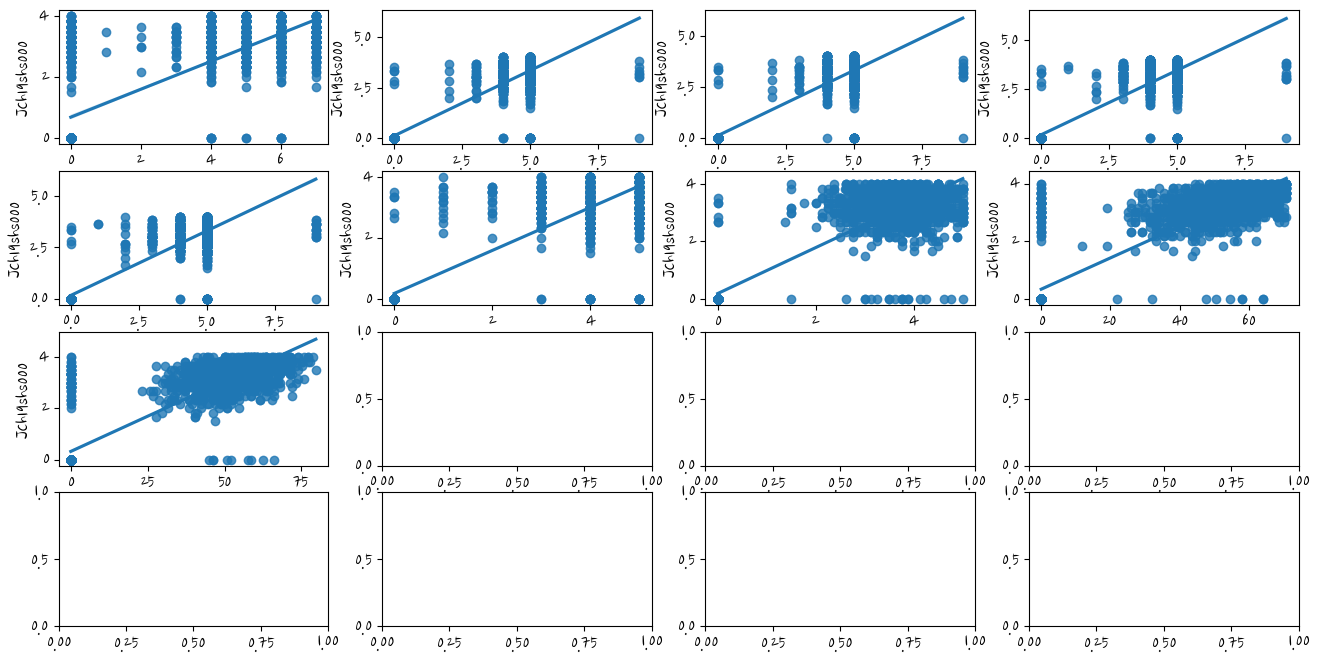

In [509]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4, nrows=4)
lm_features = ['FFt19shs001'   ,
'DMt19crs052',
'DMt19crs053',
'DMt19crs054',
'DMt19crs055',
'DCh19hlt049',
'DHu19cmm000',
'ACh19neo205',
'ACh19neo206',
]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='JCh19shs000', data = X, ax=axs[row][col])

In [506]:
ww= w1[[
    'JCh19shs000',
'DMt19crs052',
'DMt19crs053',
'DMt19crs054',
'DMt19crs055',
'DCh19hlt049',
'DHu19cmm000',
'DHu19cmm009',
'DHu19cmm010',
'DHu19cmm021',
'DHu19cmm022',
'DHu19cmm023',
'DHu19cmm024',
'FFt19shs001'   ,
'FFt19shs002'   ,
'FFt19shs003'   ,
'FFt19shs004'  ,]]

---
---


In [1]:
plt.figure(figsize=(9, 9))
corr = test.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)

NameError: name 'plt' is not defined

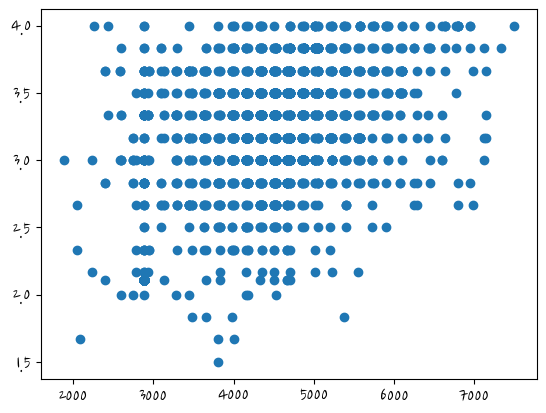

In [75]:
plt.scatter(www['책임감'],www['전반적행복감'])

In [601]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

---
---

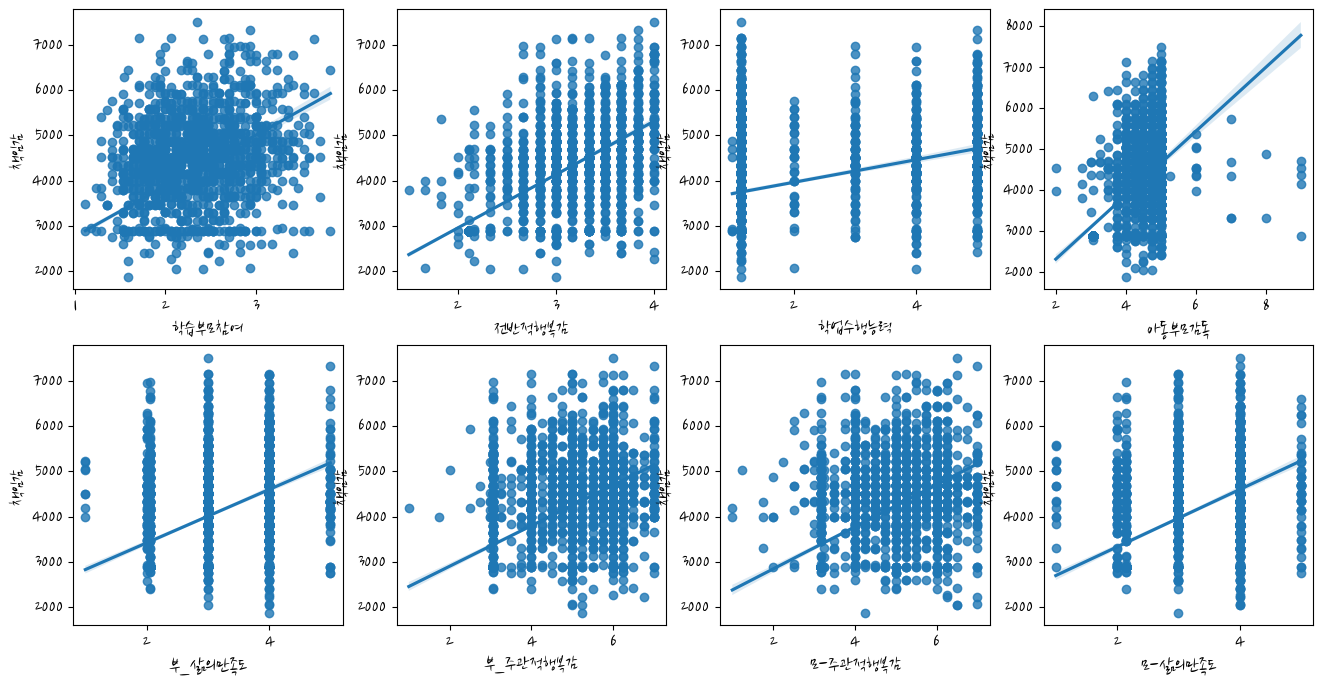

In [71]:
lm_features = ['학습부모참여', '전반적행복감', '학업수행능력', '아동부모감독',
               '부_삶의만족도', '부_주관적행복감','모-주관적행복감' ,'모-삶의만족도']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows=2)
for i , feature in enumerate(lm_features): # 인덱스 값과 , 피쳐 값 추출
    row = int(i/4) #행
    col = i%4 #열
    sns.regplot(x=feature, y = '책임감', data=www, ax=axs[row][col])

In [76]:
df = www

In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

---

In [692]:
df[df['사회성']>80]

,학습부모참여,전반적행복감,자아탄력성,자아정체감,삶의만족도,아동자율성,신체적자아상,학업스트레스,학업수행능력,아동부모감독,...,모-식생활중독,모-일상적스트레스,모-삶의만족도,모-주관적건강상태,모-우울,모-주관적행복감,모-음주여부횟수,모-음주량,모-과음횟수,모-흡연여부


In [79]:
#이상치제거
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
    

outlier_index = get_outlier(df=df, column='책임감', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: RangeIndex(start=0, stop=2150, step=1)


In [81]:
y = df['책임감']
X = df.drop(columns=['책임감'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')
# rmse 는 price에서 rmse만큼 차이가 난다.
# R2는 1에 가까울 수록 좋은 것

MSE: 61180.99071778809, RMSE: 247.34791431865378, R2: 0.9473172941098551


In [82]:
pd.Series(np.round(lr.coef_,1), index=X.columns).sort_values(ascending=False) 

유능감          141.9
자극추구          58.1
지배성           57.7
사회성           54.1
신체적자아상        45.8
부_주관적건강상태     35.4
모-주관적행복감      29.6
삶의만족도         29.1
미디어기기중독       27.2
모-흡연여부        24.8
모-우울          21.0
친화성           20.9
개방성           20.8
모-과음횟수        18.0
학업스트레스         7.0
혼자있는시간         6.5
모-일상적스트레스      6.1
부_일상적스트레스      5.8
부_우울           4.4
자아정체감          3.7
모-주관적건강상태      1.1
모-결혼만족도       -0.0
부_결혼만족도       -0.0
아동부모감독        -0.4
학습부모참여        -2.3
자아탄력성         -3.7
부_주관적행복감      -5.2
정서성           -5.9
사고유연성         -7.7
모-음주여부횟수      -7.9
관용성성실성       -10.4
신뢰성          -11.4
모-음주량        -12.5
온정성          -12.9
창의성          -14.4
학업수행능력       -16.3
전반적행복감       -18.6
모-삶의만족도      -24.3
부_삶의만족도      -26.2
모-식생활중독      -54.3
조직성          -56.1
시간사용만족       -58.2
아동자율성        -58.8
외향성         -132.9
dtype: float64

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
neg_mse_scores= cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)

neg_mse_scores # 회귀는 점수가 음수 형태로 나옴

np.mean(np.sqrt(neg_mse_scores * -1))
# 양수로 변경하고 루트 씌워서 rmse로 만들기
# 5개로 나눴을 때 모델 점수 값의 평균을 구함

260.28714476355543

In [92]:
#릿지
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [93]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv=5) 

np.mean(np.sqrt(neg_mse_scores * -1))
# 5.828658946215817 : alpha 값 조정 안했을때
# 값이 작을 수록 더 좋은 성능

259.6715829905086

In [94]:
alphas=[0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    print(np.mean(np.sqrt(neg_mse_scores * -1)))
    
# alpha가 100일때가 가장 좋은 점수

260.2871445135435
260.2651469065212
260.1182866666747
259.6715829905086
259.0665947223595


<function matplotlib.pyplot.show(close=None, block=None)>

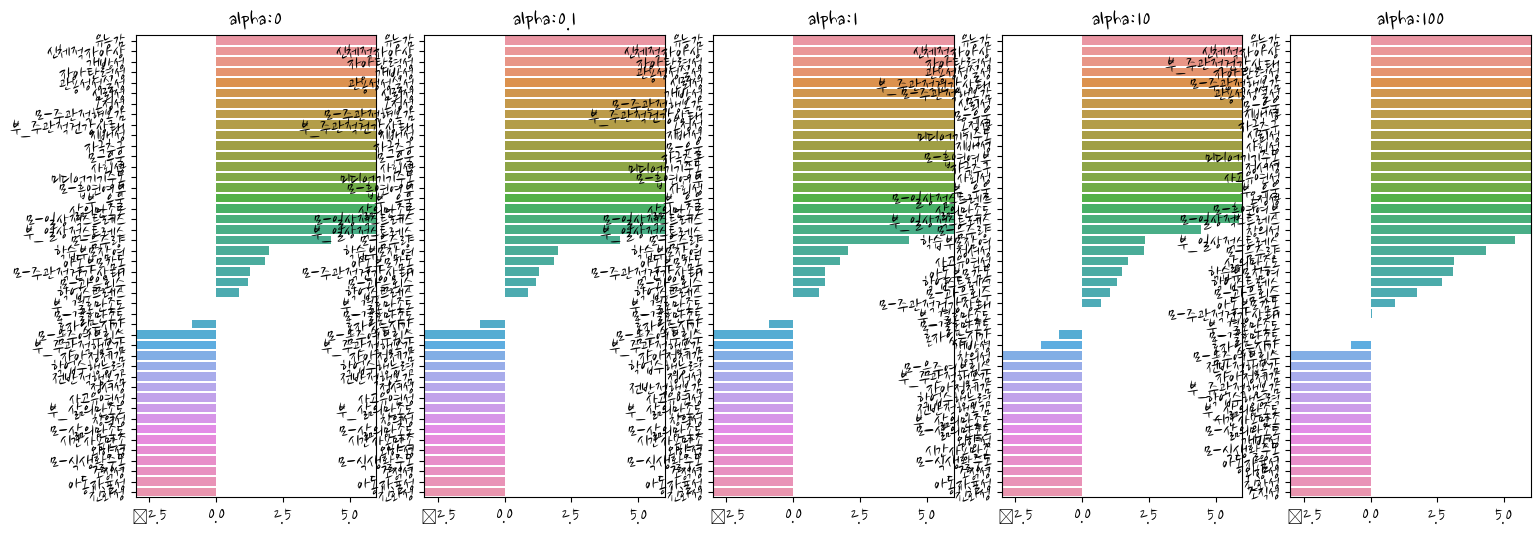

In [95]:
fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff = pd.Series(ridge.coef_, index=X.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
plt.show

In [96]:
ridge_alphas = [0,0.1,1,10,100]
sort_columns = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
유능감,1.412820e+02,1.412826e+02,1.412857e+02,1.412524e+02,1.405392e+02
신체적자아상,5.197167e+01,5.195786e+01,5.180984e+01,4.976850e+01,3.476550e+01
개방성,4.703651e+01,4.552188e+01,3.461558e+01,-1.546062e+00,-2.550130e+01
자아탄력성,4.574143e+01,4.569072e+01,4.522788e+01,4.094266e+01,2.112267e+01
관용성성실성,4.324263e+01,4.307863e+01,4.152422e+01,3.100278e+01,1.853125e+01
신뢰성,3.895183e+01,3.879422e+01,3.729800e+01,2.713159e+01,1.488075e+01
온정성,2.982473e+01,2.968550e+01,2.836611e+01,1.942649e+01,8.620600e+00
모-주관적행복감,2.913402e+01,2.912757e+01,2.906160e+01,2.819931e+01,2.108613e+01
부_주관적건강상태,2.880067e+01,2.879793e+01,2.877094e+01,2.835731e+01,2.367378e+01
지배성,2.455910e+01,2.415414e+01,2.154292e+01,1.712673e+01,1.647815e+01


In [97]:
# 랏쏘, 엘라스틱
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [98]:
lasso_alphas = [0.05,0.07,0.1,0.5,1,3] 
#값이 너무 크면 릿지와 다르게 회귀계수(W)가 0이 되는 경우가 생김
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas, X_data_n= X,y_target_n=y)

#######  Lasso #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 259.746 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 259.715 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 259.671 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 259.257 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 259.042 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 259.482 


In [99]:
elastic_alphas = [0.05,0.07,0.1,0.5,1,3] 
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params=elastic_alphas, X_data_n= X,y_target_n=y)

#######  ElasticNet #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 259.357 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 259.260 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 259.158 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 259.156 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 259.875 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 265.012 


In [100]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [101]:
alphas = [0.1,1,10,100]
scale_methods = [(None, None),
                 ('Standard', None),
                 ('Standard',2),
                 ('MinMax', None),
                 ('MinMax',2),
                 ('Log', None)]
for scale_method in scale_methods:
    X_scaled_data = get_scaled_data(method=scale_method[0],p_degree=scale_method[1], input_data=X)
    print(f'{scale_method[0]}   {scale_method[1]}')
    get_linear_reg_eval('Ridge', params= alphas, X_data_n=X_scaled_data, y_target_n=y, return_coeff=False)
    
#로그가 정규분포 형태이므로 제일 좋은 값...이라고 한듯

None   None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 260.265 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 260.118 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 259.672 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 259.067 
Standard   None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 259.876 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 259.963 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 265.028 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 334.040 
Standard   2
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 607.794 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 532.253 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 424.596 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 360.721 
MinMax   None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 260.532 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 279.417 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 410.750 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 541.566 
MinMax   2
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 322.666 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 276.627 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 278.750 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 399.609 
Log   None
#######  Ridge #######


In [102]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [105]:
log_y = np.log1p(y_test)
log_pred = np.log1p(pred)
squared_error = (log_y - log_pred)**2
rmsle = np.sqrt(np.mean(squared_error))

rmse=np.sqrt(mean_squared_error(y_test,pred))

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y, pred):
    rmse= rmse(y,pred)
    mae= 'rmse'
    print(f' RMSE : {rmse}, MAE:{mae}')

In [ ]:
y = df['책임감']
X = df.drop(columns='책임감')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

print('rmsle',np.sqrt(np.mean(squared_error)))
print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
print('mae',mean_absolute_error(y_test, pred))


rmsle 0.06005416009840026
rmse 247.34791431865378
mae 149.79164234419704


In [ ]:
df

,학습부모참여,전반적행복감,자아탄력성,자아정체감,삶의만족도,아동자율성,신체적자아상,학업스트레스,학업수행능력,아동부모감독,...,모-식생활중독,모-일상적스트레스,모-삶의만족도,모-주관적건강상태,모-우울,모-주관적행복감,모-음주여부횟수,모-음주량,모-과음횟수,모-흡연여부
0,2.882353,2.833333,2.857143,2.625000,2.666667,2.400000,2.600000,3.333333,1.148372,5.00000,...,1.600000,3.000000,2.000000,3.000000,2.333333,4.000000,2.000000,1.000000,2.000000,0.013023
1,2.588235,3.000000,3.142857,2.625000,3.000000,2.600000,2.000000,2.666667,5.000000,4.00000,...,2.300000,3.000000,3.000000,2.000000,2.333333,4.750000,1.000000,1.000000,1.000000,0.013023
2,3.000000,3.000000,2.142857,2.875000,3.333333,1.400000,2.600000,1.000000,1.148372,4.00000,...,2.200000,3.000000,4.000000,4.000000,1.500000,5.750000,1.000000,1.000000,1.000000,0.013023
3,1.539289,2.112403,1.953056,1.797558,2.167442,1.740465,2.000651,1.385426,1.148372,3.06186,...,1.092837,1.768837,2.147907,2.039535,1.132016,3.159884,1.549767,0.781395,0.916279,0.013023
4,2.705882,3.000000,3.071429,2.750000,3.333333,2.400000,3.400000,2.666667,1.148372,4.50000,...,1.400000,3.000000,4.000000,2.000000,2.166667,5.250000,2.000000,1.000000,1.000000,0.013023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,2.117647,2.666667,3.214286,2.500000,2.666667,2.600000,2.400000,1.666667,3.000000,5.00000,...,1.600000,3.000000,4.000000,4.000000,1.666667,6.750000,1.000000,1.000000,1.000000,0.013023
2146,1.882353,3.166667,3.000000,2.625000,2.666667,2.200000,3.000000,1.000000,5.000000,3.00000,...,1.800000,3.000000,2.000000,3.000000,2.166667,3.500000,1.000000,1.000000,1.000000,0.013023
2147,1.539289,2.112403,1.953056,1.797558,2.167442,1.740465,2.000651,1.385426,1.148372,3.06186,...,1.092837,1.768837,2.147907,2.039535,1.132016,3.159884,1.549767,0.781395,0.916279,0.013023
2148,2.235294,3.333333,3.214286,2.875000,3.000000,3.000000,3.200000,2.000000,5.000000,5.00000,...,1.900000,3.000000,4.000000,3.000000,2.000000,5.000000,2.000000,2.000000,2.000000,0.013023


In [108]:
def get_top_error_data(y_test,pred,n_top=5):
    result_df = pd.DataFrame(y_test.values, columns=['real'])
    result_df['pred']=np.round(pred)
    result_df['diff']= np.abs(result_df['real']- result_df['pred'])
    print(result_df.sort_values('diff', ascending=False)[:n_top])

In [109]:

get_top_error_data(y_test,pred,n_top=5)

     real    pred    diff
303  3650  2275.0  1375.0
149  2950  3913.0   963.0
142  3650  4574.0   924.0
114  4530  5426.0   896.0
63   4880  5763.0   883.0


<AxesSubplot:>

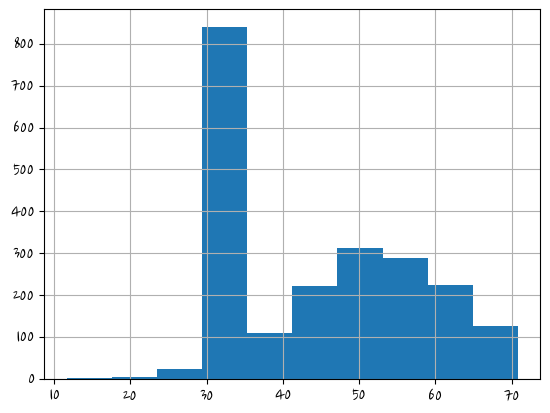

In [719]:
df['사회성'].hist()

In [114]:
w['책임감']

0       4850
1       5020
2       4530
3       2882
4       5230
        ... 
2145    4330
2146    4670
2147    2882
2148    4880
2149    6070
Name: 책임감, Length: 2150, dtype: int64

---
# 따릉이 크롤링

In [ ]:
pip install bs4


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=b238ca511e411800b23c5e02896d6e60486e300a80cad840b749ea50abb753b3
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import time
import csv

In [825]:
URL = 'https://www.naver.com'

driver= webdriver.Chrome('/Users/beomi/Downloads/chromedriver')

driver.implicitly_wait(10)

driver.get('https://datalab.naver.com/keyword/trendResult.naver?hashKey=N_f1308307eeb6fc3cebc15bd6087c9c38')

t = driver.find_element(By.XPATH,'//*[@id="content"]/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[1]')
t2 = ActionChains(driver).move_to_element(t).perform()
print(t2)

None


In [779]:
html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=107.0.5304.108)
Stacktrace:
Backtrace:
	Ordinal0 [0x00E4ACD3+2075859]
	Ordinal0 [0x00DDEE61+1633889]
	Ordinal0 [0x00CDB7BD+571325]
	Ordinal0 [0x00CC2E1A+470554]
	Ordinal0 [0x00D2AA0B+895499]
	Ordinal0 [0x00D3AC96+961686]
	Ordinal0 [0x00D27136+880950]
	Ordinal0 [0x00CFFEFD+720637]
	Ordinal0 [0x00D00F3F+724799]
	GetHandleVerifier [0x010FEED2+2769538]
	GetHandleVerifier [0x010F0D95+2711877]
	GetHandleVerifier [0x00EDA03A+521194]
	GetHandleVerifier [0x00ED8DA0+516432]
	Ordinal0 [0x00DE682C+1665068]
	Ordinal0 [0x00DEB128+1683752]
	Ordinal0 [0x00DEB215+1683989]
	Ordinal0 [0x00DF6484+1729668]
	BaseThreadInitThunk [0x7767FEF9+25]
	RtlGetAppContainerNamedObjectPath [0x77BF7BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77BF7B8E+238]


---
# 미련...여기서부터 다시돌려본거

In [65]:
w = pd.read_csv('data_아동/아동.csv')

In [66]:
w.drop(columns='Unnamed: 0', inplace=True)

In [69]:
  w['책임감'] = w['책임감'].apply(lambda x : round(x *100),2)

In [53]:
w.columns

Index(['학습부모참여', '전반적행복감', '자아탄력성', '자아정체감', '삶의만족도', '아동자율성', '신체적자아상',
       '학업스트레스', '학업수행능력', '아동부모감독', '외향성', '사회성', '지배성', '자극추구', '개방성', '창의성',
       '정서성', '사고유연성', '친화성', '온정성', '신뢰성', '관용성성실성', '유능감', '조직성', '책임감',
       '혼자있는시간', '부_결혼만족도', '부_일상적스트레스', '부_삶의만족도', '부_주관적건강상태', '부_우울',
       '부_주관적행복감', '시간사용만족', '미디어기기중독', '모-식생활중독', '모-결혼만족도', '모-일상적스트레스',
       '모-삶의만족도', '모-주관적건강상태', '모-우울', '모-주관적행복감', '모-음주여부횟수', '모-음주량',
       '모-과음횟수', '모-흡연여부'],
      dtype='object')

<AxesSubplot:>

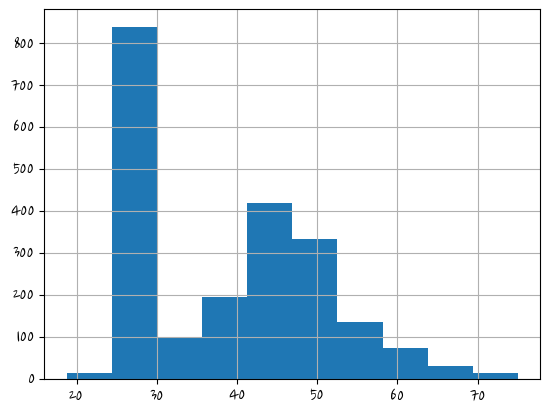

In [68]:
w['책임감'].hist()

In [70]:
www = w